<h1> Problema de las N-reinas: implementaciones y acercamientos a algoritmos orientados a la resolución del problema.</h1>
<p><h6 align='center'> Buscamos implementar y contrastar distintos algoritmos que nos permitieran resolver el 
problema de las N-reinas con las restricciones originales del problema, a su vez indagamos en 
las distintas tecnicas de solución que se han propuesto hasta el dia de hoy y como muchos han optado
por algoritmos que satisfacen este problema viendo la aplicabilidad en distintos campos</h6></p>

<h3>Implementación del algoritmo de Sosic y Jun Gu</h3>

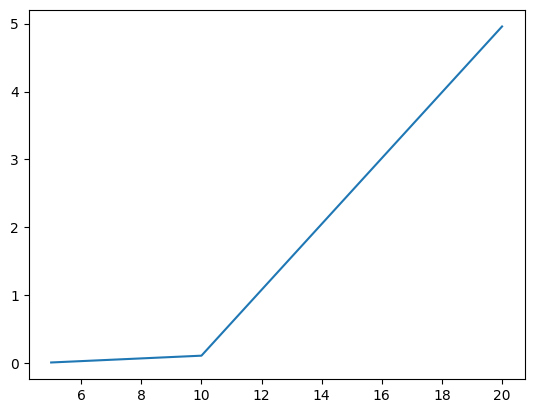

In [2]:
import matplotlib.pyplot as plt
time = [0.00885,0.1090,4.95787]
n_queens = [5,10,20]

plt.plot(n_queens,time)
plt.show()